In [1]:
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelfStack')
warnings.warn('Do not show this message')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Тестирование гипотез

In [4]:
df = pd.read_excel('AB_Test_Results (2).xlsx')

In [5]:
df.head(5)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [7]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [8]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [9]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [11]:
df[df['VARIANT_NAME']=='variant'].describe()

,USER_ID,REVENUE
count,5016.000000,5016.000000
mean,4972.776914,0.070070
std,2876.320625,1.314802
min,3.000000,0.000000
25%,2476.500000,0.000000
50%,4958.500000,0.000000
75%,7415.250000,0.000000
max,10000.000000,58.630000


In [12]:
df[df['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,4984.000000,4984.000000
mean,4989.436798,0.129013
std,2905.145109,3.007524
min,2.000000,0.000000
25%,2466.000000,0.000000
50%,4964.500000,0.000000
75%,7576.250000,0.000000
max,10000.000000,196.010000


## Проверка на нормальность

(array([ 85., 100., 104.,  99., 113., 123., 106.,  87.,  97., 117.,  95.,
         90., 102., 110.,  92., 108.,  99.,  98., 113.,  88.,  92.,  86.,
        115.,  91.,  95., 107.,  88.,  87., 104.,  99., 107.,  97.,  86.,
         85., 101., 102.,  81., 101., 108., 100., 127., 104., 105., 101.,
         87., 100., 102., 100.,  99., 101.]),
 array([2.00000e+00, 2.01960e+02, 4.01920e+02, 6.01880e+02, 8.01840e+02,
        1.00180e+03, 1.20176e+03, 1.40172e+03, 1.60168e+03, 1.80164e+03,
        2.00160e+03, 2.20156e+03, 2.40152e+03, 2.60148e+03, 2.80144e+03,
        3.00140e+03, 3.20136e+03, 3.40132e+03, 3.60128e+03, 3.80124e+03,
        4.00120e+03, 4.20116e+03, 4.40112e+03, 4.60108e+03, 4.80104e+03,
        5.00100e+03, 5.20096e+03, 5.40092e+03, 5.60088e+03, 5.80084e+03,
        6.00080e+03, 6.20076e+03, 6.40072e+03, 6.60068e+03, 6.80064e+03,
        7.00060e+03, 7.20056e+03, 7.40052e+03, 7.60048e+03, 7.80044e+03,
        8.00040e+03, 8.20036e+03, 8.40032e+03, 8.60028e+03, 8.80024e+03,
 

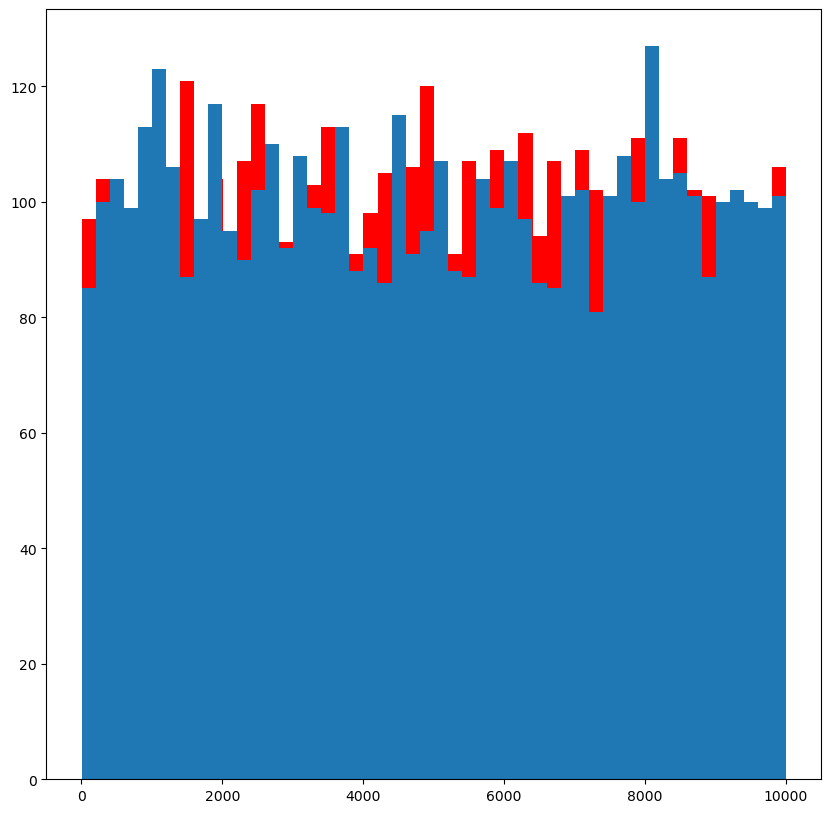

In [19]:
plt.figure(figsize=(10, 10))
test_group = df['USER_ID'][df['VARIANT_NAME']=='variant']
control_group = df['USER_ID'][df['VARIANT_NAME']=='control']

plt.hist(test_group, color = 'r', bins =50)
plt.hist(control_group, bins =50)

In [20]:
# Анализ дохода в каждой группе
grouped_data = df.groupby('VARIANT_NAME')['REVENUE']
for name, group in grouped_data:
    print(f'Group {name}:')
    print(f'Median: {group.median()}')
    print(f'Mean: {group.mean()}')
    print(f'Min: {group.min()}')
    print(f'Max: {group.max()}')
    print()

Group control:
Median: 0.0
Mean: 0.12901284109149277
Min: 0.0
Max: 196.01

Group variant:
Median: 0.0
Mean: 0.07006977671451356
Min: 0.0
Max: 58.63



<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

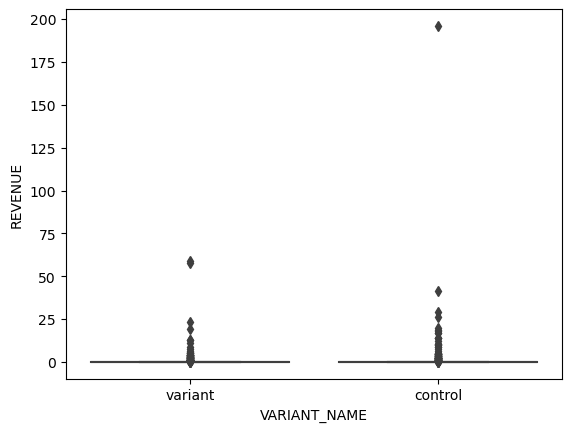

In [22]:
# Распределение дохода в каждой группе
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=df)

In [24]:
from scipy.stats import ttest_ind

In [25]:
# T-тест
t_stat, p_value = ttest_ind(df[df['VARIANT_NAME'] == 'variant']['REVENUE'],
                            df[df['VARIANT_NAME'] == 'control']['REVENUE'])
print(f'T-test result: T-statistic={t_stat}, p-value={p_value}')


T-test result: T-statistic=-1.2711634519010084, p-value=0.20370007853373565


# Рекомендации
На основании этого результата можно сделать вывод, что статистически значимой разницы в среднем доходе между группами не обнаружено. 
В таком случае, можно рекомендовать менеджеру не использовать variant_name для увеличения дохода сайта